The dataset with pictures, masks and a .json file containing Questions and answere were downloaded from https://drive.google.com/file/d/1jTyLWwcHzbLpWjSNwmgiiavXDjuQe5y7/view and put into a folder "data"

In [15]:
import os
import json
import matplotlib.pyplot as plt

Get some information about the dataset

In [25]:
def prettyPrintMetaData(metaData: dict):
    if not metaData:
        print("[]")
    print(f"----{metaData.get('ImageID')}----")
    for entry in metaData.get("Labels"):
        print(f"Question: {entry.get('Question')}")
        print(f"Answer: {entry.get('Answer')}")
        print(f"AnswerType: {entry.get('AnswerType')}")
        print("----")
    

Number of Images: <2000>, Number of Masks: <683>, Number of questionEntries: <2000>
Visualizing Picture<cl8k2u1pm1dw7083203g1b7yv>
----cl8k2u1pm1dw7083203g1b7yv----
Question: Are there any abnormalities in the image?
Answer: ['Polyp']
AnswerType: Text
----
Question: Are there any anatomical landmarks in the image?
Answer: ['No']
AnswerType: Text
----
Question: Are there any instruments in the image?
Answer: ['No']
AnswerType: Text
----
Question: Have all polyps been removed?
Answer: ['No']
AnswerType: Yes/No
----
Question: How many findings are present?
Answer: ['1']
AnswerType: Number
----
Question: How many instrumnets are in the image?
Answer: ['0']
AnswerType: Number
----
Question: How many polyps are in the image?
Answer: ['1']
AnswerType: Number
----
Question: Is there a green/black box artefact?
Answer: ['Yes']
AnswerType: Yes/No
----
Question: Is there text?
Answer: ['Yes']
AnswerType: Yes/No
----
Question: Is this finding easy to detect?
Answer: ['Yes']
AnswerType: Yes/No
----

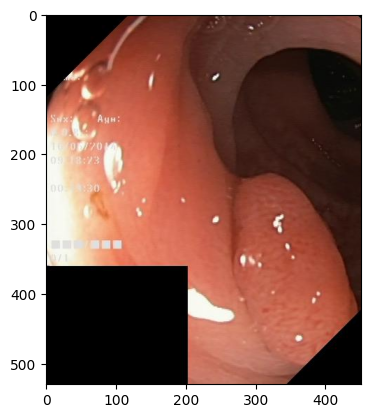

In [32]:
imageCount = 0
masksCount = 0

for root, dirs, files in os.walk("data/images"):
    for file in files:
        imageCount += 1

for root, dirs, files in os.walk("data/masks"):
    for file in files:
        masksCount += 1

with open("data/gt.json", "r") as file:
    gt = json.load(file)

print(f"Number of Images: <{imageCount}>, Number of Masks: <{masksCount}>, Number of questionEntries: <{len(gt)}>")

#Visualize a Pictue. Sorry...
imageName = "cl8k2u1pm1dw7083203g1b7yv"
print(f"Visualizing Picture<{imageName}>")
image = plt.imread(f"data/images/{imageName}.jpg")
mask = plt.imread(f"data/masks/{imageName}_mask.jpg")
data = [x for x in gt if x.get("ImageID") == imageName]

plt.imshow(image)
prettyPrintMetaData(data[0])


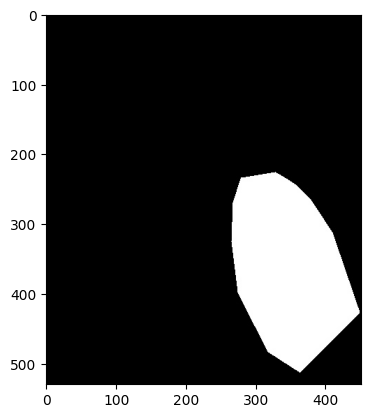

In [31]:
plt.imshow(mask)